# Data Analysis

#### General Data
    42,000 data points
    785 columns (0 is the label)
    784 features (1 - 783)
    
    dtype = int64

#### Labels
    10 labels (0 - 9)
    
    1 is the most common label
    5 is the least common label

    std of label: 2.887730141841058
    mean of label: 4.456642857142858

    Uniform distribution

#### Features
    80 pixels are always 0, thus are useless in predicting labels

#### Result
    Created 3 files for training data 
        (training_data.csv (60%), validation_data.csv (20%), testing_data.csv (20%)
    Distribution of each data set's labels are uniform
    Extra features/pixels of all 0 have been removed
    
    *(Consider regularization for overfitting in the future)

In [1]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import sys
import matplotlib

%matplotlib inline

In [2]:
location = '/Users/antonmax2/Documents/dev/data/digit_recognizer/train.csv'
df = pd.read_csv(location)

In [3]:
print(df)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11         9       0       0       0    

In [4]:
df.label.dtypes # label type

dtype('int64')

In [5]:
df.label.value_counts() # label counts

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1133eeb70>]],
      dtype=object)

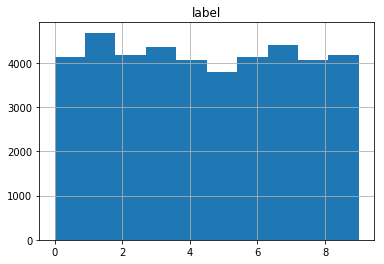

In [6]:
df.hist(column='label') # label distribution

In [7]:
print("std of label: {}".format(df['label'].std()))   # label standard deviation
print("mean of label: {}".format(df['label'].mean())) # label mean

std of label: 2.8877301418416326
mean of label: 4.456642857142858


In [8]:
df.describe() # viewing statistics per feature (includes label)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
features = df.iloc[:,1:785] # excluding labels to get features only

In [10]:
features_NZ = features.loc[:, (features != 0).any(axis=0)] # excluding all features where only has 0

In [11]:
features_NZ.describe() # non-zero features

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
count,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000
mean,0.00300,0.011190,0.005143,0.000214,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,...,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857
std,0.56812,1.626927,1.053972,0.043916,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,...,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,116.00000,254.000000,216.000000,9.000000,16.000000,47.000000,157.000000,254.000000,255.000000,243.000000,...,255.000000,255.00000,255.000000,255.000000,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000


In [12]:
feat_data = features_NZ.sample(frac=1) # randomizing rows

In [13]:
feat_data.describe() # we can see with 1/2 data the statistics are use-able though lack precision

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
count,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000
mean,0.00300,0.011190,0.005143,0.000214,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,...,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857
std,0.56812,1.626927,1.053972,0.043916,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,...,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,116.00000,254.000000,216.000000,9.000000,16.000000,47.000000,157.000000,254.000000,255.000000,243.000000,...,255.000000,255.00000,255.000000,255.000000,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125851d68>]],
      dtype=object)

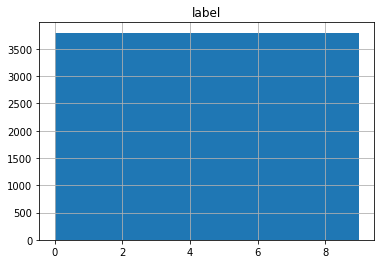

In [14]:
df_NZ = df.loc[:, (df != 0).any(axis=0)] # excluding all features where only has 0

dataframe_collection = {}
for i in range(10):
    dataframe_collection[i] = df_NZ.loc[df['label'] == i] # selecting all rows for respective labels
for i in range(10):
    dataframe_collection[i] = dataframe_collection[i][:3795] # making all labels have equal number of examples

df_NZ = pd.concat(dataframe_collection) # concatonating dataframes
df_NZ.hist(column='label') # visually verifying we have a perfect plateau

In [15]:
#Creating training, validation, and testing data sets for my models to use.
#Each data set has a uniform distribution of labels
#Data sets cut 60:20:20 respectively (train, val, test)

dataframe_tr = {}
dataframe_val = {}
dataframe_te = {}

for i in range(10):
    dataframe_tr[i] = dataframe_collection[i][:2277]
for i in range(10):
    dataframe_val[i] = dataframe_collection[i][2277:3036]
for i in range(10):
    dataframe_te[i] = dataframe_collection[i][3036:]

training_data = pd.concat(dataframe_tr) #60% = 2,277
validation_data = pd.concat(dataframe_val) #20% = 759
testing_data = pd.concat(dataframe_te) #20% = 759

# Shuffling data
training_data = training_data.sample(frac=1) 
validation_data = validation_data.sample(frac=1)
testing_data = testing_data.sample(frac=1)

In [16]:
path='/Users/antonmax2/Documents/dev/data/digit_recognizer/'
training_data.to_csv(path+'train_data.csv', index=False)
validation_data.to_csv(path+'val_data.csv', index=False)
testing_data.to_csv(path+'test_data.csv', index=False)
train dataframe...